## Introduction

Importing helper functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)


import re
import sys
import os
import datetime as dt
import time

# Get the current working directory
current_directory = os.getcwd()

# Specify the relative path to helper functions folder
relative_path_to_helper_folder = r"C:\Users\10041594B\Documents\Python_Scripts"

# Path to data
helper_functions_folder = os.path.normpath(os.path.join(current_directory, relative_path_to_helper_folder))

# Append it to sys.path so Python knows where to import from
sys.path.append(helper_functions_folder)

[Read emails from outlook](https://stackoverflow.com/questions/5077625/reading-e-mails-from-outlook-with-python-through-mapi)

In [2]:
import win32com.client
outlook = win32com.client.Dispatch('Outlook.Application')

In [3]:
mapi = outlook.GetNamespace("MAPI")
for account in mapi.Accounts:
    print(account.DeliveryStore.DisplayName)
    print(account)

malcolm.ron-pereira@ambankgroup.com
malcolm.ron-pereira@ambankgroup.com


```python
inbox = mapi.GetDefaultFolder(6) # Full inbox
messages = inbox.Items
len(messages)
# Restrict the email I want to analyze - this takes a few seconds
# Using list comprehension
restrict_messages = [message for message in messages if (re.search(pattern=r'.*GCIF Final Release.*', string=message.Subject))
                     and (message.SenderEmailAddress == r'leong.tongshenq@kewmann.com')] # 
print(len(restrict_messages))
```

We use to be able to run the above to retrieve the desired emails from Inbox, however, we can only load so many emails at a time.
> Now that our Inbox has grown, we will try to put the desired emails form `leong.tongshenq@kewmann.com` into a new Folder.

The first step was creating a subfolder of Inbox folder, namely Archive for Automation, and moving the emails to there <br>

In [4]:
outlook = win32com.client.Dispatch("Outlook.Application")
mapi = outlook.GetNamespace("MAPI")

# Access the Folder Items
messages = mapi.Folders['Archive for Automation'].Folders['Emails'].Items
for message in messages:
    print(message.Subject)

RE: GCIF Final Release - SIT Execution Status Report (10-May-2024) 
RE: GCIF Final Release - SIT Execution Status Report (09-May-2024) 
RE: GCIF Final Release - SIT Execution Status Report (08-May-2024) 
RE: GCIF Final Release - SIT Execution Status Report (07-May-2024) 
RE: GCIF Final Release - SIT Execution Status Report (06-May-2024) 
RE: GCIF Final Release - SIT Execution Status Report (05-May-2024) 
RE: GCIF Final Release - SIT Execution Status Report (02-May-2024) 
RE: GCIF Final Release - SIT Execution Status Report (30-Apr-2024) 
RE: GCIF Final Release - SIT Execution Status Report (26-Apr-2024)
RE: GCIF Final Release - SIT Execution Status Report (29-Apr-2024)
RE: GCIF Final Release - SIT Execution Status Report (25-Apr-2024)
RE: GCIF Final Release - SIT Execution Status Report (24-Apr-2024)
RE: GCIF Final Release - SIT Execution Status Report (23-Apr-2024)
RE: GCIF Final Release - SIT Execution Status Report (22-Apr-2024)
RE: GCIF Final Release - SIT Execution Status Report (

In [5]:
type(mapi.Folders['Archive for Automation'].Folders['Emails'])

win32com.client.CDispatch

In [6]:
len(messages)

25

In [7]:
# Restrict/Filter the email I want to analyze using the same list comprehension logic, for demonstration purposes, no change
# Using list comprehension
restrict_messages = [message for message in messages if (re.search(pattern=r'.*GCIF Final Release.*', string=message.Subject))
                     and (message.SenderEmailAddress == r'leong.tongshenq@kewmann.com')] # 
print(len(restrict_messages))

25


Unable to utilise the .Restrict() method due to lack of 'filtering power'. Using list comprehension instead.

```python
chain_restrict_messages = messages.Restrict("[SenderEmailAddress] = 'leong.tongshenq@kewmann.com'")
chain_restrict_messages = messages.Restrict("[Subject] = 'GCIF Final Release'")
print(len(chain_restrict_messages))
```

In [8]:
extract_date_from_subject = [(message.Subject,\
                             re.search(pattern=r'\((.*)\)\s*$', string=message.Subject).group(1)
                             )\
                             for message in restrict_messages]
extract_date_from_subject

[('RE: GCIF Final Release - SIT Execution Status Report (10-May-2024) ',
  '10-May-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (09-May-2024) ',
  '09-May-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (08-May-2024) ',
  '08-May-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (07-May-2024) ',
  '07-May-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (06-May-2024) ',
  '06-May-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (05-May-2024) ',
  '05-May-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (02-May-2024) ',
  '02-May-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (30-Apr-2024) ',
  '30-Apr-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (26-Apr-2024)',
  '26-Apr-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (29-Apr-2024)',
  '29-Apr-2024'),
 ('RE: GCIF Final Release - SIT Execution Status Report (25-Apr-2024)',
  '25-Apr-2024'),
 (

Let's check if there are any duplicates, again for the sake of argument.

In [9]:
titles = []
for title, date in extract_date_from_subject:
    titles.append(title)
from collections import Counter
duplicates = [item for item, count in Counter(titles).items() if count > 1]
duplicates

[]

Old note
>These duplicates are due to tongshenq replying to some query, so while these emails do technically have the tables we need, they are redundant and will be dealt with accordingly.

New Note
> We have filtered the emails manually in Outlook, so there should be no replies/forwards to the daily reports by TongShenq.

In [10]:
## Example of converting a pywintypes.datetime to a string or normal datatime
import random
# Select a random message from the list
message = random.choice(restrict_messages)
print(f" {type(message.ReceivedTime)}")
# This function can take a str, or datetime-like-type, if so 'unit' parameter can take a vestigial value
timestamp = pd.Timestamp(message.ReceivedTime, unit = 'Anything can be written here') 
print(f"{timestamp} is of type {type(timestamp)}")
# Alternatively 
import dateutil.parser
# dateutil works like strptime - parse string to time
dateutil.parser.parse(str(timestamp))

 <class 'pywintypes.datetime'>
2024-04-05 01:54:13.875000+00:00 is of type <class 'pandas._libs.tslibs.timestamps.Timestamp'>


datetime.datetime(2024, 4, 5, 1, 54, 13, 875000, tzinfo=tzutc())

In [11]:
for message in list(messages)[-2:]:
    print(message.Subject, message.ReceivedTime, message.SenderEmailAddress, message.Body, sep='||')

RE: GCIF Final Release - SIT Execution Status Report (03-Apr-2024)||2024-04-04 09:26:52.765000+00:00||leong.tongshenq@kewmann.com||CAUTION: This email originated from outside of AmBank. Do not click links or open attachments unless you recognize the sender and know the content is safe.


Dear All, 

Below is the status update as of 03-April-2024: 

Track

Start Date

End Date

Plan Completion (%)

Actual Completion (%)

Passed Rate

Failed Rate

Remark

DataLake

01-Apr-2024

19-Apr-2024

35.48%

35.48%

100%

0%

Started

DataQuality

03-Apr-2024

19-Apr-2024

13.70%

13.70%

100%

0%

Started

DataSecurity

05-Apr-2024

30-Apr-2024

-

-

-

-

MetadataManagement

05-Apr-2024

30-Apr-2024

-

-

-

-

GCIF + CDL

08-Apr-2024

03-May-2024

-

-

-

-

GCIF Dashboard 

15-Apr-2024

10-May-2024

-

-

-

-



Apr-2024

May-2024

Track

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

1

2

3

4

5

6

7

8

9

10

DL

15

20


Let's preview the first soup objects

In [12]:

from bs4 import BeautifulSoup
count = 0
for message in list(restrict_messages):
    html = message.HTMLbody # Convert win32com.client.CDispatch to str
    soup = BeautifulSoup(html) # Convert the mail content from string to soup object
    all_tables = soup.find_all(name='table', attrs={'class':'MsoNormalTable'})
    print(all_tables[0].prettify())
    count += 1
    if count == 1:
        break

<table border="0" cellpadding="0" cellspacing="0" class="MsoNormalTable" style="border-collapse:collapse">
 <tbody>
  <tr>
   <td style="width:116.85pt;border:solid windowtext 1.0pt;background:#E9FED6;padding:0in 5.4pt 0in 5.4pt" valign="top" width="156">
    <p align="center" style="margin:0in;text-align:center">
     <b>
      <span style="font-size:10.0pt;color:#4472C4">
       Track
      </span>
     </b>
     <span style="font-size:10.0pt">
      <o:p>
      </o:p>
     </span>
    </p>
   </td>
   <td style="width:116.85pt;border:solid windowtext 1.0pt;border-left:none;background:#DEEAF6;padding:0in 5.4pt 0in 5.4pt" valign="top" width="156">
    <p align="center" style="margin:0in;text-align:center">
     <b>
      <span style="font-size:10.0pt;color:#4472C4">
       Start Date
      </span>
     </b>
     <span style="font-size:10.0pt">
      <o:p>
      </o:p>
     </span>
    </p>
   </td>
   <td style="width:84.85pt;border:solid windowtext 1.0pt;border-left:none;background:#

In [13]:
# Using pickle

In [14]:
%%time
# Writing the file - pickling
big_list = []
for message in restrict_messages:
    html = message.HTMLbody
    soup = BeautifulSoup(html)
    big_list.append(soup)
    
import pickle
with open('outfile.pkl', 'wb') as fp:
    pickle.dump(big_list, fp)

CPU times: total: 20 s
Wall time: 45.4 s


In [15]:
%%time
# Writing to txt
with open('outfile.txt', 'w') as f:
    for line in big_list:
        f.write(f"{line}\n")

CPU times: total: 4.91 s
Wall time: 8.06 s


In [16]:
%%time
# Serialise data - takes one minute
import yaml
serialized_data = yaml.dump(big_list)

CPU times: total: 37.3 s
Wall time: 54.3 s


In [17]:
%%time
import gzip
with gzip.open("outfile.gz", "wb") as f:
    f.write(serialized_data.encode('utf-8')) # Encode to bytes if not already

CPU times: total: 438 ms
Wall time: 710 ms


In [18]:
%%time
import lzma
with lzma.open("outfile.xz", "wb") as f:
    f.write(serialized_data.encode('utf-8'))

CPU times: total: 1.88 s
Wall time: 2.77 s


## Reading the pickle file
> 

In [19]:
%%time
# Takes a while to read the pickle
import pickle
# Reading the file - unpickling
with open ('outfile.pkl', 'rb') as fp:
    itemlist = pickle.load(fp)

CPU times: total: 17.5 s
Wall time: 25.6 s


In [20]:
message = itemlist[0]
type(message)

bs4.BeautifulSoup

In [21]:
message_email = restrict_messages[0]
type(message_email)

win32com.client.CDispatch

The best check is to look for the following 'special' phrasing in the paragraph tags, 
> Below is the status update as of 

In [22]:
import dateutil.parser
from dateutil.parser import ParserError
from bs4 import BeautifulSoup
import re
# Define variable restrict_messages or itemlist
message = itemlist[0] # or itemlist[0] # list(restrict_messages)[2]
try: # Will fail for itme list
    my_html_str = message.HTMLbody # Convert win32com.client.CDispatch to str
    my_soup = BeautifulSoup(my_html_str, "html.parser") # Convert the mail content from string to soup object
except (AttributeError, TypeError): # In the event of using itemslist
    print('Using itemlist')
    message_str = str(message) # Each item in itemlist is actually a bs4.BeautifulSoup object! So converting to string...
    # ... and then back to soup
    my_soup = BeautifulSoup(message_str, "html.parser") # Convert the mail content from string to soup object
    pass

special_phrase = lambda x: re.compile(r'Below is the status update as of').search(x)
# Validate the soup - ensuring we are dealing with html-like content, these email are usually attachments tongshenq has replied to.
if my_soup.find(name='html').get('xmlns') == None:
    print('Not valid soup')
    pass
else:
    # Getting all the tables
    my_tables_html = my_soup.find_all(name='table', attrs={'class':'MsoNormalTable'})
    # IF a genuine report email is found, then the first-bolded text is a datestring, and the 'special' phrasing is found within the first few ptags
    ## Get the date by retrieving the first bolded text
    possible_date_str = my_soup.find_all(name='b')[0].text
    ## Get the special phrasing within the first few lines
    p_text_li = [td.text for td in my_soup.find_all('p') if td.text != str()] # return a list, i.e [text1, text2, text3, ...]
    special_list = list(filter(special_phrase, p_text_li[:10]))
    print(f'possible_date_str : {possible_date_str} with type : {type(possible_date_str)}')
    try:
        date_name = dateutil.parser.parse(possible_date_str) # like an automatic strptime()
    except ParserError:
        print('Conversational email, not a real status report')
    if special_list:
        backtostring = date_name.strftime("%d-%B-%Y")
        print(f'backtostring {backtostring} with type : {type(backtostring)}')
    else:
        print('Skipping this redundant email')

Using itemlist
possible_date_str : 10-May-2024 with type : <class 'str'>
backtostring 10-May-2024 with type : <class 'str'>


In [23]:
# Quick example
import dateutil.parser
import datetime as dt
datestring = '24rd July 2025'
try:
    yourdate = dateutil.parser.parse(datestring)
    print(f'Converted date successfully {yourdate} as datatype {type(yourdate)}')
except ParserError:
    print('Error mate')

Converted date successfully 2025-07-24 00:00:00 as datatype <class 'datetime.datetime'>


In [24]:
# Just some code doodles
yourdate = 'From: '
print(yourdate)
print(type(yourdate))
isinstance(yourdate, dt.datetime)

From: 
<class 'str'>


False

In [25]:
column_headers = []
for i in my_tables_html[0].find_all(name="tr")[0]:
    each_header = i.text
    column_headers.append(each_header)
print("The old headers are", column_headers)
# column_headers = list(filter(lambda el: el != '\n', column_headers))
column_headers = [i.strip() for i in column_headers if i != '\n']
print("The new headers are", column_headers)

The old headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
The new headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']


In [26]:
list_of_dictionaries = []
for meat_ in my_tables_html[4].find_all('tr')[1:]:  # Exclude the header
    row_data = meat_.find_all('td') # Within each <tr> tag, return a list, i.e [<td>text1</td>, <td>text2</td>, <td>text3</td>, ... ]
    row_list = [td.text for td in row_data] # return a list, i.e [text1, text2, text3, ...]
    # Convert the two lists into a dictionary
    main_dict_ = {column_headers[i] : row_list[i] for i in range(len(column_headers))}
    # Append dictionary to list of dicts
    list_of_dictionaries.append(main_dict_)

In [27]:
import pandas as pd
import numpy as np
ex = pd.DataFrame(list_of_dictionaries)
ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)

In [28]:
from analyse_dtypesANDnulls import analyse_dtypesANDnulls
analyse_dtypesANDnulls(ex, sample_row='worst')

Imported as a module
Dataframe shape has 2 rows and 8 columns 



,Column Name,Datatype,Number of Nulls,Percentage Null,Worst Row
0,Track,object,0,0.0,Track
1,Start Date,object,0,0.0,Total TC
2,End Date,object,0,0.0,Total Plan Execution
3,Plan Completion (%),object,0,0.0,Total Passed
4,Actual Completion (%),object,0,0.0,Total Failed
5,Passed Rate,object,0,0.0,Total Not Executed
6,Failed Rate,object,0,0.0,Plan Execution
7,Remark,object,0,0.0,Executed


In [29]:
display(ex)

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,Track,Total TC,Total Plan Execution,Total Passed,Total Failed,Total Not Executed,Plan Execution,Executed
1,GCIF Dashboard,203,203,203,0,0,37,37


```python
## Full script
import win32com.client
import pandas as pd
import numpy as np
import dateutil.parser
from dateutil.parser import ParserError
from bs4 import BeautifulSoup

outlook = win32com.client.Dispatch('Outlook.Application')
mapi = outlook.GetNamespace("MAPI")
inbox = mapi.GetDefaultFolder(6)
messages = inbox.Items
# Restrict the emails I want to analyze
restrict_messages = [message for message in list(messages) if (re.search(pattern='GCIF Final Release', string=message.Subject)) and \
                     (message.SenderEmailAddress == 'leong.tongshenq@kewmann.com')]

special_phrase = lambda x: re.compile(r'Below is the status update as of').search(x)
count = 0
dfs= {}
for e_message in list(restrict_messages):
    # Convert the mail content from string to soup object
    e_html = e_message.HTMLbody
    e_soup = BeautifulSoup(e_html)
    # Validate the soup 
    if e_soup.find(name='html').get('xmlns') == None:
        print('Not valid soup')
        print(count)
        pass
    else:
        # Getting all the tables
        my_tables_html = e_soup.find_all(name='table', attrs={'class':'MsoNormalTable'})
        # IF a genuine report email is found, then the first-bolded text is a datestring, and the 'special' phrasing is found within the first few ptags
        ## Get the date by retrieving the first bolded text
        possible_date_str = e_soup.find_all(name='b')[0].text
        ## Get the special phrasing within the first few lines
        p_text_li = [td.text for td in e_soup.find_all('p') if td.text != str()] # return a list, i.e [text1, text2, text3, ...]
        special_list = list(filter(special_phrase, p_text_li[:10]))
        print(f'possible_date_str : {possible_date_str}')
        try:
            date_name = dateutil.parser.parse(possible_date_str) # like an automatic strptime()
        except ParserError:
            print('Conversational email, not a real status report')
            pass
        if special_list:
            date_str = date_name.strftime("%d-%B-%Y")
            # The first table in each email will be the progress table
            e_prog_table = my_tables_html[0]
            ## Parse HTML to pandas
            column_headers = []
            for i in e_prog_table.find_all(name="tr")[0]:
                each_header = i.text
                column_headers.append(each_header)
                # print("The old headers are", column_headers)
            column_headers = [i.strip() for i in column_headers if i != '\n']
            print(f'The dataframe will be named {date_str}')
            print("The new headers are", column_headers)
            list_of_dictionaries = []
            for meat_ in e_prog_table.find_all('tr')[1:]:  # Exclude the header
                row_data = meat_.find_all('td') # Within each <tr> tag, return a list, i.e [<td>text1</td>, <td>text2</td>, <td>text3</td>, ... ]
                row_list = [td.text for td in row_data] # return a list, i.e [text1, text2, text3, ...]
                # Convert the two lists into a dictionary
                main_dict_ = {column_headers[i] : row_list[i] for i in range(len(column_headers))}
                # Append dictionary to list of dicts
                list_of_dictionaries.append(main_dict_)
                ex = pd.DataFrame(list_of_dictionaries)
                ex.replace({r'\s-\s':np.NaN, '[%\n\r]':''}, regex=True, inplace=True)
                # Append dataframe to dfs
                dfs[date_name] = ex
            count += 1
        else:
            print('Skipping this redundant email \n')
```

In [30]:
# Define some functions 
def HTML_table_to_df(html_table, header_index=0):
    """
    Takes a html table and specify which row_index is the colum_header. Usually this will be 0.
    """
    column_headers = []
    for i in html_table.find_all(name='tr')[header_index]:
        header = i.text
        column_headers.append(header)
    column_headers = [i.strip() for i in column_headers if i != '\n']
    list_of_dictionaries = []
    for meat_ in html_table.find_all('tr')[header_index+1:]:  # Exclude the header
        row_data = meat_.find_all('td') # Within each <tr> tag, return a list, i.e [<td>text1</td>, <td>text2</td>, <td>text3</td>, ... ]
        row_list = [td.text for td in row_data] # return a list, i.e [text1, text2, text3, ...]
        # Convert the two lists into a dictionary
        main_dict_ = {column_headers[i] : row_list[i] for i in range(len(column_headers))}
        # Append dictionary to list of dicts
        list_of_dictionaries.append(main_dict_)
        ex = pd.DataFrame(list_of_dictionaries) # 
        ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)
    return ex

def change_datatype(df_suffix, column, change_to, date_format='%d-%b-%Y'):
    """
    Specify a column in the dataframe and also specify the change_to.
    """
    
    e_df = dfs[f"{date_str}_{df_suffix}"]
    if change_to == 'datetime':
        e_df[column] = pd.to_datetime(e_df[column], format=date_format) 
        print(f'Diagnose {column} in {df_suffix} into datatype : {change_to}')
    elif change_to == 'float':
        e_df[column] = e_df[column].astype(float)
        print(f'Diagnose {column} in {df_suffix} into datatype : {change_to}')
    # return dfs[f"{date_name}_progress"][column]

## Adding the html function

## Solved
1.) Solving the table matching with `ambi_table` <br>
2.) Converting to the right datatypes

In [31]:
## Full script with function call -- edit
import win32com.client
import os 
import re
from bs4 import BeautifulSoup
import pickle
import dateutil.parser
from dateutil.parser import ParserError

# outlook = win32com.client.Dispatch('Outlook.Application')
# mapi = outlook.GetNamespace("MAPI")
# inbox = mapi.GetDefaultFolder(6)
# messages = inbox.Items

# --------------EMAILS START--------------------------
outlook = win32com.client.Dispatch("Outlook.Application")
mapi = outlook.GetNamespace("MAPI")
messages = mapi.Folders['Archive for Automation'].Folders['Emails'].Items
# Restrict the emails I want to analyze
restrict_messages = [message for message in list(messages) if (re.search(pattern='GCIF Final Release', string=message.Subject)) and \
                     (message.SenderEmailAddress == 'leong.tongshenq@kewmann.com')]
special_phrase = lambda x: re.compile(r'Below is the status update as of').search(x)
print('DONE PROCESSING EMAILS')
# --------------EMAILS END----------------------------

#--------------- PICKLE FILE START ------------------------
# Reading the file - unpickling
with open ('outfile.pkl', 'rb') as fp:
    itemlist = pickle.load(fp)
#--------------- PICKLE FILE END --------------------------


# Edit here
is_use_email = True

if is_use_email:
    my_container = restrict_messages
else:
    my_container = itemlist

count = 0
dfs={}

for e_message in my_container:
    try: # Will fail for itme list
        my_html_str = e_message.HTMLbody # Convert win32com.client.CDispatch to str
    except (AttributeError, TypeError): # In the event of using itemslist
        print('Using itemlist')
        my_html_str = str(e_message) # Each item in itemlist is actually a bs4.BeautifulSoup object! So converting to string...
        # ... and then back to soup
    finally:
        e_soup = BeautifulSoup(my_html_str, "html.parser") # Convert the mail content from string to soup object
        # Validate the soup 
        if e_soup.find(name='html').get('xmlns') == None:
            print('Not valid soup')
            pass
        else:
            # Get all HTML tables in the email 
            tables_per_email = e_soup.find_all(name='table', attrs={'class':'MsoNormalTable'})
            # IF a genuine report email is found, then the first-bolded text is a datestring, 
            ## Get the date by retrieving the first bolded text
            possible_date_str = e_soup.find_all(name='b')[0].text
            ## Get the special phrasing within the first few lines of the paragraph tags
            p_text_li = [td.text for td in e_soup.find_all('p') if td.text != str()][:10] # return a list, i.e [text1, text2, text3, ...]
            special_list = list(filter(special_phrase, p_text_li))
            print(f'\npossible_date_str : {possible_date_str}')
            try:
                date_name = dateutil.parser.parse(possible_date_str) # like an automatic strptime()
            except ParserError:
                print('Conversational email, not a real status report')
                pass
            if special_list:
                date_str = date_name.strftime("%d-%B-%Y")    
                ## Parse HTML using function
                for ambi_table in tables_per_email[:5]: 
                    column_headers = []
                    for i in ambi_table.find_all(name='tr')[0]:
                        header = i.text
                        column_headers.append(header)
                    column_headers = [i.strip() for i in column_headers if i != '\n']
                    print("The ambi-headers are", column_headers)
    
                    ## Identify and classify the ambitable - IF block
                    if all(col in column_headers for col in ['Start Date', 'End Date']):
                        progress_table = ambi_table
                        progress_df = HTML_table_to_df(html_table=progress_table, header_index=0)
                        # Append dataframe to dfs
                        dfs[f"{date_str}_Progress"] = progress_df
                        print(f'THE DATAFRAME WILL BE NAMED {f"{date_str}_Progress"}')
                        display(progress_df.head(1))
    
                    elif all(col in column_headers for col in ['Blocked by Defect', 'Total Defects']):
                        breakdown_table = ambi_table
                        breakdown_df = HTML_table_to_df(html_table=breakdown_table, header_index=0)
                        # Append dataframe to dfs
                        dfs[f"{date_str}_TC_breakdown"] = breakdown_df
                        print(f'THE DATAFRAME WILL BE NAMED {f"{date_str}_TC_breakdown"}')
    
                    elif all(col in column_headers for col in ['Accumulated', 'Daily Execution']):
                        daily_table = ambi_table
                        daily_df = HTML_table_to_df(html_table=daily_table, header_index=1)
                        # Append dataframe to dfs
                        dfs[f"{date_str}_Daily"] = daily_df
                        print(f'THE DATAFRAME WILL BE NAMED {f"{date_str}_Daily"}')
    
                    # elif  all(col in column_headers for col in ["Pending Clarification", "Tester Clarified"]):
                    #     review_table = ambi_table
                    #     review_df = HTML_table_to_df(html_table=review_table, header_index=0)
                    #     dfs[f"{date_name}_Review"] = review_df
            
                # Create a conversion_dict holding the parameter, argument pairs
                conversion_dict = {
                           1: {'df_suffix':'Progress', 'column':'Start Date', 'change_to':'datetime'},
                           2: {'df_suffix':'Progress', 'column':'End Date', 'change_to':'datetime'}, 
                           3: {'df_suffix':'Progress', 'column':'Actual Completion (%)', 'change_to':'float'},
                           4: {'df_suffix':'Progress', 'column':'Plan Completion (%)', 'change_to':'float'},
                           5: {'df_suffix':'Progress', 'column':'Passed Rate', 'change_to':'float'},
                           6: {'df_suffix':'Progress', 'column':'Failed Rate', 'change_to':'float'}
                          }
                index = 7
            
                ## Appending to conversion_dict
                for float_column in breakdown_df.columns.tolist()[1:]:
                    row_dict = {'df_suffix':'TC_breakdown', 'column':float_column, 'change_to':'float'}
                    conversion_dict.update({index:row_dict})
                    index += 1
            
                for float_column in daily_df.columns.tolist()[1:]:
                    row_dict = {'df_suffix':'Daily', 'column':float_column, 'change_to':'float'}
                    conversion_dict.update({index:row_dict})
                    index += 1
            
                # for float_column in review_df.columns.tolist()[1:]:
                #     row_dict = {'df_suffix':'Review', 'column':float_column, 'change_to':'float'}
                #     conversion_dict.update({index:row_dict})
                #     index += 1
                    
                # Cast into right data types
                for idx, row_dict in conversion_dict.items():
                    change_datatype(**row_dict)
                    # change_datatype(df_suffix=row_dict['df_suffix'],\
                    #                 column=row_dict['column'],\
                    #                 change_to=row_dict['change_to'])
        
                # Without change_to function
                # dfs[f"{date_name}_progress"]['Start Date'] = pd.to_datetime(dfs[f"{date_name}_progress"]['Start Date'], format='%d-%B-%Y') 
                # dfs[f"{date_name}_progress"]['End Date'] = pd.to_datetime(dfs[f"{date_name}_progress"]['End Date'], format='%d-%B-%Y') 
                # dfs[f"{date_name}_progress"]['Plan Completion (%)'] = dfs[f"{date_name}_progress"]['Plan Completion (%)'].astype(float)

DONE PROCESSING EMAILS

possible_date_str : 10-May-2024
The ambi-headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
THE DATAFRAME WILL BE NAMED 10-May-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 10-May-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 10-May-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Cat

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 09-May-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 09-May-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Cat

C:\Users\10041594B\AppData\Local\Temp\ipykernel_14464\1180551316.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)



possible_date_str : 08-May-2024
The ambi-headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
THE DATAFRAME WILL BE NAMED 08-May-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 08-May-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 08-May-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Cat

C:\Users\10041594B\AppData\Local\Temp\ipykernel_14464\1180551316.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)



possible_date_str : 07-May-2024
The ambi-headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
THE DATAFRAME WILL BE NAMED 07-May-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 07-May-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 07-May-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Cat

C:\Users\10041594B\AppData\Local\Temp\ipykernel_14464\1180551316.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)



possible_date_str : 06-May-2024
The ambi-headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
THE DATAFRAME WILL BE NAMED 06-May-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 06-May-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 06-May-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Cat

C:\Users\10041594B\AppData\Local\Temp\ipykernel_14464\1180551316.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)



possible_date_str : 05-May-2024
The ambi-headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
THE DATAFRAME WILL BE NAMED 05-May-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 05-May-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 05-May-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Cat

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 02-May-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 02-May-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Cat

C:\Users\10041594B\AppData\Local\Temp\ipykernel_14464\1180551316.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)



possible_date_str : 30-April-2024
The ambi-headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
THE DATAFRAME WILL BE NAMED 30-April-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 30-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 30-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance /

C:\Users\10041594B\AppData\Local\Temp\ipykernel_14464\1180551316.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)



possible_date_str : 29-April-2024
The ambi-headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
THE DATAFRAME WILL BE NAMED 29-April-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Completed. Pending Sign-Off


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 29-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 29-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance /

C:\Users\10041594B\AppData\Local\Temp\ipykernel_14464\1180551316.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ex.replace({r'^\s*-\s*$':np.nan, '[%\n\r]':''}, regex=True, inplace=True)



possible_date_str : 25-April-2024
The ambi-headers are ['Track', 'Start Date', 'End Date', 'Plan Completion (%)', 'Actual Completion (%)', 'Passed Rate', 'Failed Rate', 'Remark']
THE DATAFRAME WILL BE NAMED 25-April-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,100,100,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 25-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 25-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance /

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,99.35,99.35,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 24-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 24-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance /

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,99.35,99.35,100,0,Started (test case DL125 for MHPS only can proceed after 24-Apr)


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 23-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 23-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance /

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,99.35,99.35,100,0,Started (test case DL125 for MHPS only can proceed after 24-Apr)


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 22-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 22-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance /

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,99.35,99.35,100,0,Started (test case DL125 for MHPS only can proceed after 24-Apr)


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 18-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'PIC', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 18-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance /

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,90.32,90.32,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 15-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'Severity', 'Status']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 15-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Catch 

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,80.65,80.65,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 12-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'Severity']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 12-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Catch Up in TC_b

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,77.42,77.42,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 09-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'Severity']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 09-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Catch Up in TC_b

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,74.19,74.19,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 06-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'Severity']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 06-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Catch Up in TC_b

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,61.29,61.29,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 05-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'Severity']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 05-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Catch Up in TC_b

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,48.39,48.39,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 04-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'Severity']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 04-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Catch Up in TC_b

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,35.48,35.48,100,0,Started


The ambi-headers are ['', 'Apr-2024', 'May-2024']
The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 03-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'Severity']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 03-April-2024_Daily
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress into datatype : float
Diagnose Failed Rate in Progress into datatype : float
Diagnose Total TC in TC_breakdown into datatype : float
Diagnose Total Executed in TC_breakdown into datatype : float
Diagnose Balance / Catch Up in TC_b

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,01-Apr-2024,19-Apr-2024,22.58,22.58,100,0,Started


The ambi-headers are ['Tracks', 'Total TC', 'Total Executed', 'Balance / Catch Up', 'Total Executed - Passed', 'Total Executed - Failed', 'Total Defects', 'Blocked by Defect', 'Backlog (catchup)', 'Yet to execute', 'NA']
THE DATAFRAME WILL BE NAMED 02-April-2024_TC_breakdown
The ambi-headers are ['No', 'Issue', 'Impact', 'Severity']
The ambi-headers are ['', '', 'Accumulated', 'Daily Execution']
THE DATAFRAME WILL BE NAMED 02-April-2024_Daily
The ambi-headers are ['DL (total test case in this list included Monday 01-Apr)', 'DL001DL002DL003DL004DL005DL006DL007DL008DL009DL010', 'DL011DL012DL013DL014DL015DL016DL017DL018DL019DL020', 'DL021DL022DL023DL024DL025DL026DL027DL028DL029DL030', 'DL031DL032DL033DL034DL035', '-']
Diagnose Start Date in Progress into datatype : datetime
Diagnose End Date in Progress into datatype : datetime
Diagnose Actual Completion (%) in Progress into datatype : float
Diagnose Plan Completion (%) in Progress into datatype : float
Diagnose Passed Rate in Progress in

In [32]:
type(restrict_messages)

list

In [33]:
# Reading the file - unpickling
with open ('outfile.pkl', 'rb') as fp:
    itemlist = pickle.load(fp)

for e_message in itemlist:
    message = str(e_message) # Each item in itemlist is actually a bs4.BeautifulSoup object! So converting to string...
    # ... and then back to soup
    my_soup = BeautifulSoup(message, "html.parser") # Convert the mail content from string to soup object

Remember to delete the folder Clean_Tables if rerunning the code below again.

In [34]:
# Ready to output
tables_dir = './Clean_Tables'
try:
    os.makedirs(tables_dir, exist_ok=False)
    for e_df_name, e_df in dfs.items():

        # Create subfolders 
        sub_folder = re.search(pattern=r'_([\w]+)$', string=e_df_name).group(1)
        os.makedirs(name=f'./{tables_dir}/{sub_folder}', exist_ok=True)
    
        # Write the in-memory csv to disk
        data_output = os.path.normpath(os.path.join(os.getcwd(), tables_dir, sub_folder, f'{e_df_name}.csv'))
        e_df.to_csv(data_output, sep=',')
except FileExistsError:
    print(f'File already exists. Skipping writing to output. Delete {tables_dir} if you want to write to output.')

File already exists. Skipping writing to output. Delete ./Clean_Tables if you want to write to output.


In Windows folders, files are always sorted lexicograhically.
>If we want to sort by dates, then we have to prefix the each file in the sorted files with th

In [35]:
os.getcwd()

'C:\\Users\\10041594B\\Documents\\Digital Solutions\\Python Folder\\TC Visualisation'

In [36]:
from datetime import datetime
pattern=re.compile(r'(\d{2})-([\w]+)-(\d{4})_[\w]+\.csv')
def get_date_from_filename(filename):
    """
    Parse the filename(string) to a datetime object. This is a dependent function .
    """
    match = re.compile(pattern).search(filename)
    if match:
        day, month, year = match.groups()
        return datetime.strptime(f"{day}-{month}-{year}", "%d-%B-%Y")
    return None

def sort_and_rename_files_in_directory(directory):
    files = os.listdir(directory)
    sorted_files = sorted([filename for filename in files if pattern.search(filename)], \
                          key=get_date_from_filename)
    print('Sorted files by date : \n', sorted_files)

    # In order for Windows directory to be sorted, add a prefix to each file
    for index, file in enumerate(sorted_files, start=1):
        prefix = f'{index:03d}'
        new_name = f"{prefix}_{file}" # Triple digit zero pad
        old_path = os.path.join(directory, file)
        new_path = os.path.join(directory, new_name)

        # rename the file
        os.rename(old_path, new_path)

        print(f'Renamed {file} to {new_name} in folder "{directory}"')
        
# Sort the folders in tables_dir(./Clean_Tables)
for (unique_path, folder_li, files_li) in list(os.walk(top=os.path.normpath(os.path.join(os.getcwd(), tables_dir))))[1:]: # Exclude ancestor path
    sort_and_rename_files_in_directory(unique_path)

Sorted files by date : 
 ['001_02-April-2024_Daily.csv', '002_03-April-2024_Daily.csv', '003_04-April-2024_Daily.csv', '004_05-April-2024_Daily.csv', '005_06-April-2024_Daily.csv', '006_09-April-2024_Daily.csv', '007_12-April-2024_Daily.csv', '008_15-April-2024_Daily.csv', '009_18-April-2024_Daily.csv', '010_22-April-2024_Daily.csv', '011_23-April-2024_Daily.csv', '012_24-April-2024_Daily.csv', '013_25-April-2024_Daily.csv', '014_29-April-2024_Daily.csv', '015_30-April-2024_Daily.csv', '016_02-May-2024_Daily.csv', '017_05-May-2024_Daily.csv', '018_06-May-2024_Daily.csv', '019_07-May-2024_Daily.csv', '020_08-May-2024_Daily.csv', '021_09-May-2024_Daily.csv', '022_10-May-2024_Daily.csv']
Renamed 001_02-April-2024_Daily.csv to 001_001_02-April-2024_Daily.csv in folder "C:\Users\10041594B\Documents\Digital Solutions\Python Folder\TC Visualisation\Clean_Tables\Daily"
Renamed 002_03-April-2024_Daily.csv to 002_002_03-April-2024_Daily.csv in folder "C:\Users\10041594B\Documents\Digital Solutio

In [37]:
analyse_dtypesANDnulls(dfs['09-May-2024_Progress'], sample_row='worst')

Dataframe shape has 7 rows and 8 columns 



,Column Name,Datatype,Number of Nulls,Percentage Null,Worst Row
0,Track,object,0,0.0,DataLake
1,Start Date,datetime64[ns],0,0.0,2024-04-01 00:00:00
2,End Date,datetime64[ns],0,0.0,2024-04-19 00:00:00
3,Plan Completion (%),float64,0,0.0,100.0
4,Actual Completion (%),float64,0,0.0,100.0
5,Passed Rate,float64,0,0.0,100.0
6,Failed Rate,float64,0,0.0,0.0
7,Remark,object,0,0.0,Completed. Pending Sign-Off


## Visualisations

In [38]:
from pprint import pprint
pprint(list(dfs.keys())[:20])

['10-May-2024_Progress',
 '10-May-2024_TC_breakdown',
 '10-May-2024_Daily',
 '09-May-2024_Progress',
 '09-May-2024_TC_breakdown',
 '09-May-2024_Daily',
 '08-May-2024_Progress',
 '08-May-2024_TC_breakdown',
 '08-May-2024_Daily',
 '07-May-2024_Progress',
 '07-May-2024_TC_breakdown',
 '07-May-2024_Daily',
 '06-May-2024_Progress',
 '06-May-2024_TC_breakdown',
 '06-May-2024_Daily',
 '05-May-2024_Progress',
 '05-May-2024_TC_breakdown',
 '05-May-2024_Daily',
 '02-May-2024_Progress',
 '02-May-2024_TC_breakdown']


In [39]:
## Test a dataframe
random_key = random.choice(list(dfs.keys()))
print(random_key)
dfs[random_key]

02-May-2024_Progress


,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,2024-04-01,2024-04-19,100.0,100.00,100.0,0.0,Completed. Pending Sign-Off
1,DataQuality,2024-04-03,2024-04-19,100.0,100.00,100.0,0.0,Completed. Pending Sign-Off
2,DataSecurity,2024-04-05,2024-05-03,100.0,100.00,100.0,0.0,Started
3,MetadataManagement,2024-04-05,2024-04-30,100.0,100.00,100.0,0.0,Started
4,GCIF,2024-04-08,2024-05-06,100.0,82.12,100.0,0.0,Started
5,CDL,2024-05-07,2024-05-08,NaN,NaN,NaN,NaN,Not started
6,GCIF Dashboard,2024-04-15,2024-05-10,58.5,36.50,100.0,0.0,Started


In [40]:
### date_progress
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
import re
import os

dataframe_name = '23-April-2024_Progress' # Change date here 

get_date_re = re.search(pattern=r'(.*)_Progress$', string=dataframe_name)
try: # Read memory
    df = dfs[dataframe_name]
except NameError: # Otherwise use csv
    file = ''.join(list(filter(lambda x : re.search(dataframe_name, x), os.listdir(rf'./Clean_Tables/Progress'))))
    df = pd.read_csv(rf'./Clean_Tables/Progress/{file}')
    
fig = px.timeline(df, x_start="Start Date", x_end="End Date", y="Track", color="Actual Completion (%)",\
                  text="Actual Completion (%)",
                  range_color=[0,100],\
                  color_continuous_scale=[(0, "red"), (0.5, "orange"), (1, "green")],\
                  title=f'Gantt Chart Track Progress Health Check as of {get_date_re.group(1)} EOD')
                   
fig.add_vline(x=dt.datetime.strptime(get_date_re.group(1), '%d-%B-%Y') + dt.timedelta(days=1),\
              line_width=3, line_dash="dash", line_color='maroon')
fig.add_vrect(x0=dt.date(2024, 4, 6), x1=dt.date(2024, 4, 8), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 10), x1=dt.date(2024, 4, 12), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 13), x1=dt.date(2024, 4, 15), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 20), x1=dt.date(2024, 4, 22), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 27), x1=dt.date(2024, 4, 29), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 5, 4), x1=dt.date(2024, 5, 6), opacity=0.2, fillcolor='grey')

fig.update_yaxes(autorange="reversed")
fig.show()

This is decent, but we need to reserve color for another discreate column <br>
We can showcase the 'Completion_Fraction' as progress bars.

In [41]:
from matplotlib import colors
import numpy as np

def interpolate_color(value, range_color, color_continuous_scale):
    # Normalize the value to a 0-1 scale
    min_val, max_val = range_color
    norm_value = (value - min_val) / (max_val - min_val)
    norm_value = np.clip(norm_value, 0, 1)

    # Find the two scale points between which the normalized value lies
    for i in range(len(color_continuous_scale) - 1):
        left_pos, left_color = color_continuous_scale[i]
        right_pos, right_color = color_continuous_scale[i + 1]
        if left_pos <= norm_value <= right_pos:
            factor = (norm_value - left_pos) / (right_pos - left_pos)
            left_rgb = np.array(colors.to_rgb(left_color))
            right_rgb = np.array(colors.to_rgb(right_color))
            interp_rgb = left_rgb + (right_rgb - left_rgb) * factor
            return colors.to_hex(interp_rgb)

    # Return closest endpoint color if out of bounds
    if norm_value < color_continuous_scale[0][0]:
        return colors.to_hex(colors.to_rgb(color_continuous_scale[0][1]))
    else:
        return colors.to_hex(colors.to_rgb(color_continuous_scale[-1][1]))


interpolate_color(value=75, range_color=[0,100], color_continuous_scale=[(0, "red"), (0.5, "orange"), (1, "green")])

'#809200'

In [42]:
### date_progress
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
import calendar


dataframe_name = '15-April-2024_Progress' # Change date here 


try: # Read memory
    df = dfs[dataframe_name]
except NameError: # Otherwise use csv
    file = ''.join(list(filter(lambda x : re.search(dataframe_name, x), os.listdir(rf'./Clean_Tables/Progress'))))
    df = pd.read_csv(rf'./Clean_Tables/Progress/{file}',  parse_dates=["Start Date", "End Date"])

get_date_re = re.search(pattern=r'(.*)_Progress$', string=dataframe_name)
date_from_dataframe = dt.datetime.strptime(get_date_re.group(1), '%d-%B-%Y')
dayofweek = date_from_dataframe.strftime('%A')
# print(calendar.day_name[date_from_dataframe.weekday()])

# Omit color argument to get blue rectangles
fig = px.timeline(df, x_start="Start Date", x_end="End Date", y="Track",
                  # color="Remark",\
                  text="Actual Completion (%)",
                  opacity=0.7,
                  range_color=[0,100],\
                  color_continuous_scale=[(0, "red"), (0.5, "orange"), (1, "green")],\
                  color_discrete_sequence=px.colors.qualitative.G10,
                  title=f'Gantt Chart Track Progress Health Check as of {dayofweek}, {get_date_re.group(1)} EOD')
    
                   

# Add bars to represent progress from CV
progress_bars = []
for index, row in df.iterrows():
    if pd.isna(row['Actual Completion (%)']):
        continue
    else:
        x1 = row['Start Date'] + pd.to_timedelta(row['Actual Completion (%)']/100 * (row['End Date']-row['Start Date']))
        print(x1)
        progress_bar = dict(type='rect',
                        xref='x',
                        yref='y',
                        x0=row['Start Date'],
                        x1=x1,
                        y0=index-0.4,
                        y1=index+0.4,
                        line=dict(color='green', width=0),
                        fillcolor=interpolate_color(value=row['Actual Completion (%)'], range_color=[0,100], color_continuous_scale=[(0, "red"), (0.5, "orange"), (1, "green")]),
                        opacity=0.6)
        fig.add_shape(progress_bar)

## --------------Defining the present------------------
fig.add_vline(x=dt.datetime.strptime(get_date_re.group(1), '%d-%B-%Y') + dt.timedelta(days=1),\
              line_width=3, line_dash="dash", line_color='maroon')
# Alternatively
# fig.add_vline(x=dt.datetime.today(), line_width=3, line_dash='dash', line_color='maroon')
#---------------Defining the present------------------

fig.add_vrect(x0=dt.date(2024, 4, 6), x1=dt.date(2024, 4, 8), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 10), x1=dt.date(2024, 4, 12), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 13), x1=dt.date(2024, 4, 15), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 20), x1=dt.date(2024, 4, 22), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 27), x1=dt.date(2024, 4, 29), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 5, 4), x1=dt.date(2024, 5, 6), opacity=0.2, fillcolor='grey')

# Don't need fig.update_layout because already using fig.add_shape()
# fig.update_layout(xaxis_title="Timeline", yaxis_title='Tasks')
fig.update_yaxes(autorange="reversed")
fig.show()

2024-04-17 06:10:56.639999999
2024-04-18 03:13:32.160000
2024-04-23 09:39:36
2024-04-17 12:00:00
2024-04-12 07:19:12
2024-04-15 15:00:00


In [43]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    "task": ["Task A", "Task B"],
    "start": ["2025-07-01", "2025-07-05"],
    "end": ["2025-07-03", "2025-07-10"],
    "owner": ["Alice", "Bob"],
    "status": ["Done", "In Progress"]
})

fig = px.timeline(df, x_start="start", x_end="end", y="task", custom_data=["owner", "status"])
fig.update_traces(
    hovertemplate="<b>%{y}</b><br> \
                   Start: %{x}<br> \
                   Owner: %{customdata[0]}<br> \
                   Status: %{customdata[1]} \
                   <extra></extra>"
)
fig.show()


## Add TC review

In [44]:
## Adding our progress, that is TC review - which is a manual overwritten document, it was true on the 18th of April 2024.
TC_review = pd.read_excel(r'.\TC Review Data\Tally.xlsx')
TC_review

,Track_Long,Track_Short,Tickets Done
0,DataLake,DL,152
1,DataQuality,DQ,69
2,DataSecurity,DS,25
3,MetadataManagement,MM,9
4,GCIF + CDL,GCIF,0
5,GCIF Dashboard,GCIF Dashboard + CDL,0
6,CDL,CDL,3


In [45]:
date_name = '02-May-2024' # Change date here 

# Strip merge columns so the joins are aligned
dfs[f'{date_name}_TC_breakdown']['Tracks'] = dfs[f'{date_name}_TC_breakdown']['Tracks'].str.strip()
TC_review['Track_Short'] = TC_review['Track_Short'].str.strip()

display(dfs[f'{date_name}_TC_breakdown'])
# Merge on two different right_on columns, then concatenate 
# We are adding our TC review data
inner_1 = pd.merge(left=dfs[f'{date_name}_TC_breakdown'], right=TC_review, left_on='Tracks', right_on='Track_Short', how='inner')
inner_2 = pd.merge(left=dfs[f'{date_name}_TC_breakdown'], right=TC_review, left_on='Tracks', right_on='Track_Long', how='inner')

,Tracks,Total TC,Total Executed,Balance / Catch Up,Total Executed - Passed,Total Executed - Failed,Total Defects,Blocked by Defect,Backlog (catchup),Yet to execute,NA
0,DL,155.0,155.0,0.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DQ,74.0,74.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DS,72.0,72.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MM,18.0,18.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCIF,151.0,124.0,27.0,124.0,0.0,0.0,0.0,27.0,0.0,0.0
5,CDL,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GCIF Dashboard,200.0,73.0,127.0,73.0,0.0,0.0,0.0,44.0,83.0,0.0
7,Total,699.0,516.0,154.0,516.0,0.0,0.0,0.0,71.0,83.0,0.0


In [46]:
inner_1

,Tracks,Total TC,Total Executed,Balance / Catch Up,Total Executed - Passed,Total Executed - Failed,Total Defects,Blocked by Defect,Backlog (catchup),Yet to execute,NA,Track_Long,Track_Short,Tickets Done
0,DL,155.0,155.0,0.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,DataLake,DL,152
1,DQ,74.0,74.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,DataQuality,DQ,69
2,DS,72.0,72.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,DataSecurity,DS,25
3,MM,18.0,18.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,MetadataManagement,MM,9
4,GCIF,151.0,124.0,27.0,124.0,0.0,0.0,0.0,27.0,0.0,0.0,GCIF + CDL,GCIF,0
5,CDL,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDL,CDL,3


In [47]:
inner_2

,Tracks,Total TC,Total Executed,Balance / Catch Up,Total Executed - Passed,Total Executed - Failed,Total Defects,Blocked by Defect,Backlog (catchup),Yet to execute,NA,Track_Long,Track_Short,Tickets Done
0,CDL,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDL,CDL,3
1,GCIF Dashboard,200.0,73.0,127.0,73.0,0.0,0.0,0.0,44.0,83.0,0.0,GCIF Dashboard,GCIF Dashboard + CDL,0


In [48]:
combined_df = pd.concat([inner_1, inner_2], axis=0, ignore_index=True)
combined_df.drop_duplicates(subset=['Tracks'], keep='first', inplace=True)
combined_df

,Tracks,Total TC,Total Executed,Balance / Catch Up,Total Executed - Passed,Total Executed - Failed,Total Defects,Blocked by Defect,Backlog (catchup),Yet to execute,NA,Track_Long,Track_Short,Tickets Done
0,DL,155.0,155.0,0.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,DataLake,DL,152
1,DQ,74.0,74.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,DataQuality,DQ,69
2,DS,72.0,72.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,DataSecurity,DS,25
3,MM,18.0,18.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,MetadataManagement,MM,9
4,GCIF,151.0,124.0,27.0,124.0,0.0,0.0,0.0,27.0,0.0,0.0,GCIF + CDL,GCIF,0
5,CDL,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDL,CDL,3
7,GCIF Dashboard,200.0,73.0,127.0,73.0,0.0,0.0,0.0,44.0,83.0,0.0,GCIF Dashboard,GCIF Dashboard + CDL,0


In [49]:
dfs[f'{date_name}_Progress']

,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DataLake,2024-04-01,2024-04-19,100.0,100.00,100.0,0.0,Completed. Pending Sign-Off
1,DataQuality,2024-04-03,2024-04-19,100.0,100.00,100.0,0.0,Completed. Pending Sign-Off
2,DataSecurity,2024-04-05,2024-05-03,100.0,100.00,100.0,0.0,Started
3,MetadataManagement,2024-04-05,2024-04-30,100.0,100.00,100.0,0.0,Started
4,GCIF,2024-04-08,2024-05-06,100.0,82.12,100.0,0.0,Started
5,CDL,2024-05-07,2024-05-08,NaN,NaN,NaN,NaN,Not started
6,GCIF Dashboard,2024-04-15,2024-05-10,58.5,36.50,100.0,0.0,Started


In [50]:
# Strip merge columns so the joins are aligned
combined_df['Track_Long'] = combined_df['Track_Long'].str.strip()
dfs[f'{date_name}_Progress']['Track'] = dfs[f'{date_name}_Progress']['Track'].str.strip()

# Combine with the progress data
my_merge_2 = pd.merge(left=combined_df, right=dfs[f'{date_name}_Progress'],\
                      left_on='Track_Long', right_on='Track', how='left') # inner, outer yields the same result.

In [51]:
my_merge_2.insert(loc=my_merge_2.columns.get_loc('Tickets Done')+1,
                  column='Percentage Reviewed',
                  value=round(my_merge_2['Tickets Done']/my_merge_2['Total TC']*100,2))

In [52]:
my_merge_2.dropna(axis='index', subset=['Track'], inplace=True, ignore_index=True)
my_merge_2

,Tracks,Total TC,Total Executed,Balance / Catch Up,Total Executed - Passed,Total Executed - Failed,Total Defects,Blocked by Defect,Backlog (catchup),Yet to execute,NA,Track_Long,Track_Short,Tickets Done,Percentage Reviewed,Track,Start Date,End Date,Plan Completion (%),Actual Completion (%),Passed Rate,Failed Rate,Remark
0,DL,155.0,155.0,0.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,DataLake,DL,152,98.06,DataLake,2024-04-01,2024-04-19,100.0,100.0,100.0,0.0,Completed. Pending Sign-Off
1,DQ,74.0,74.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,DataQuality,DQ,69,93.24,DataQuality,2024-04-03,2024-04-19,100.0,100.0,100.0,0.0,Completed. Pending Sign-Off
2,DS,72.0,72.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,DataSecurity,DS,25,34.72,DataSecurity,2024-04-05,2024-05-03,100.0,100.0,100.0,0.0,Started
3,MM,18.0,18.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,MetadataManagement,MM,9,50.00,MetadataManagement,2024-04-05,2024-04-30,100.0,100.0,100.0,0.0,Started
4,CDL,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDL,CDL,3,10.34,CDL,2024-05-07,2024-05-08,NaN,NaN,NaN,NaN,Not started
5,GCIF Dashboard,200.0,73.0,127.0,73.0,0.0,0.0,0.0,44.0,83.0,0.0,GCIF Dashboard,GCIF Dashboard + CDL,0,0.00,GCIF Dashboard,2024-04-15,2024-05-10,58.5,36.5,100.0,0.0,Started


## Final viz

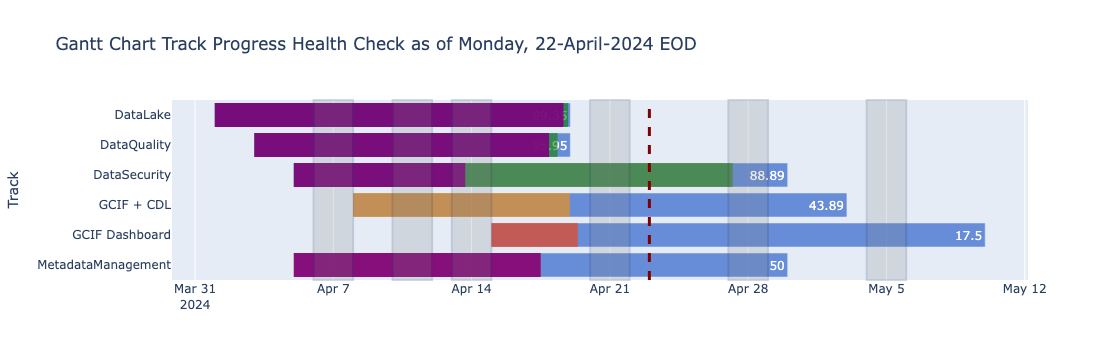

In [53]:
### date_progress
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
import calendar


# dataframe_name = '29-April-2024_Progress' # Change date here 
# get_date_re = re.search(pattern=r'(.*)_Progress$', string=dataframe_name)
# datetime_value = dt.datetime.strptime(get_date_re.group(1), '%d-%B-%Y')
# dayofweek = datetime_value.strftime('%A')

############################## START of DATA PREP ##########################
date_name = '22-April-2024' # Change date here use date >= 18th April
datetime_value = dt.datetime.strptime(date_name, '%d-%B-%Y')
dayofweek = datetime_value.strftime('%A')

TC_review = pd.read_excel(r'.\TC Review Data\Tally.xlsx') # Hardcoded file - can make this dynamic later
# Strip merge columns so the joins are aligned
dfs[f'{date_name}_TC_breakdown']['Tracks'] = dfs[f'{date_name}_TC_breakdown']['Tracks'].str.strip()
TC_review['Track_Short'] = TC_review['Track_Short'].str.strip()

# We are adding our TC review data
inner_1 = pd.merge(left=dfs[f'{date_name}_TC_breakdown'], right=TC_review, left_on='Tracks', right_on='Track_Short', how='inner')
inner_2 = pd.merge(left=dfs[f'{date_name}_TC_breakdown'], right=TC_review, left_on='Tracks', right_on='Track_Long', how='inner')

combined_df = pd.concat([inner_1, inner_2], axis=0, ignore_index=True)
combined_df.drop_duplicates(subset=['Tracks'], keep='first', inplace=True)

# Strip merge columns so the joins are aligned
combined_df['Track_Long'] = combined_df['Track_Long'] .str.strip()
dfs[f'{date_name}_Progress']['Track'] = dfs[f'{date_name}_Progress']['Track'].str.strip()

# Combine with the progress data
my_merge_2 = pd.merge(left=combined_df, right=dfs[f'{date_name}_Progress'],\
                      left_on='Track_Long', right_on='Track', how='outer') # inner, outer yields the same result.

# Insert 
my_merge_2.insert(loc=my_merge_2.columns.get_loc('Tickets Done')+1,
                  column='Percentage Reviewed',
                  value=round(my_merge_2['Tickets Done']/my_merge_2['Total TC']*100,2))

# Must ensure Track is non-null
my_merge_2.dropna(axis='index', subset=['Track'], inplace=True, ignore_index=True)
############################## END of DATA PREP ##########################

fig = px.timeline(my_merge_2, x_start="Start Date", x_end="End Date", y="Track",\
                  text="Actual Completion (%)", opacity=0.7,
                  color_discrete_sequence=px.colors.qualitative.G10,
                  # color="Remark",
                  title=f'Gantt Chart Track Progress Health Check as of {dayofweek}, {date_name} EOD',
                  hover_name='Track',
                  hover_data={
                              'Remark':False,
                              'Track':False,
                              'Percentage Reviewed':':.1f'
                  }
                  )
                   
# Add bars to represent progress from CV - traffic lights
progress_bars = []
for index, row in my_merge_2.to_dict(orient='index').items():
    if pd.isna(row['Actual Completion (%)']):
        continue
    else:
        progress_bar = dict(type='rect',
                        xref='x',
                        yref='y',
                        x0=row['Start Date'],
                        x1=row['Start Date'] + pd.to_timedelta(row['Actual Completion (%)']/100 * (row['End Date']-row['Start Date'])),
                        y0=index-0.4,
                        y1=index+0.4,
                        line=dict(color='green', width=0),
                        fillcolor=interpolate_color(value=row['Actual Completion (%)'], range_color=[0,100], color_continuous_scale=[(0, "red"), (0.5, "orange"), (1, "green")]),
                        opacity=0.6)
    fig.add_shape(progress_bar)

# Add bars to show TC_review progress - purple
review_bars = []
for index, row in my_merge_2.to_dict(orient='index').items():
    if pd.isna(row['Total Executed']):
        continue
    else:
        review_bar =  dict(type='rect',
                            xref='x',
                            yref='y',
                            x0=row['Start Date'],
                            x1=row['Start Date'] + pd.to_timedelta(row['Percentage Reviewed']/100 * (row['End Date']-row['Start Date'])),
                            y0=index-0.4,
                            y1=index+0.4,
                            line=dict(color='purple', width=0),
                            fillcolor='purple',
                            opacity=0.9)
    fig.add_shape(review_bar)
data = []

## --------------Defining the present------------------
fig.add_vline(x=dt.datetime.strptime(date_name, '%d-%B-%Y') + dt.timedelta(days=1),\
              line_width=3, line_dash="dash", line_color='maroon')
# Alternatively
# fig.add_vline(x=dt.datetime.today(), line_width=3, line_dash='dash', line_color='maroon')
#---------------Defining the present------------------

fig.add_vrect(x0=dt.date(2024, 4, 6), x1=dt.date(2024, 4, 8), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 10), x1=dt.date(2024, 4, 12), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 13), x1=dt.date(2024, 4, 15), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 20), x1=dt.date(2024, 4, 22), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 4, 27), x1=dt.date(2024, 4, 29), opacity=0.2, fillcolor='grey')
fig.add_vrect(x0=dt.date(2024, 5, 4), x1=dt.date(2024, 5, 6), opacity=0.2, fillcolor='grey')

# Don't need fig.update_layout because already using fig.add_shape()
# fig.update_layout(xaxis_title="Timeline", yaxis_title='Tasks')
fig.update_yaxes(autorange="reversed")

fig.show()

## Appendix

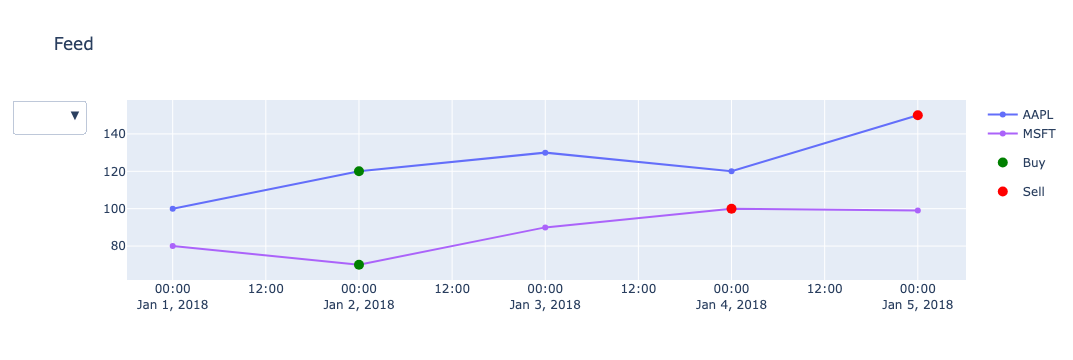

In [82]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import pandas as pd
init_notebook_mode(connected=True)

feed = pd.DataFrame({'AAPL': [100, 120, 130, 120, 150],
                     'MSFT': [80, 70, 90, 100, 99]}, index = pd.date_range('2018-01-01', '2018-01-05'))

trans = pd.DataFrame({'Symbol': ['AAPL', 'AAPL', 'MSFT', 'MSFT'],
                        'Amount': [2, 1, 3, 1],
                        'Action': ['buy', 'sell', 'buy', 'sell'],
                        'Price': [120, 150, 70, 100],
                        'Date': [pd.to_datetime(i) for i in ['2018-01-02', '2018-01-05', '2018-01-02', '2018-01-04']]
                       })

data = []

# Add "All" button
all_but = dict(label = 'All',
               method = 'update',
                  args = [{'visible': [True]},
                          {'title': 'all'}
                           ])

buttonlist = [all_but]
for i, col in enumerate(feed.columns.tolist()):
    stock = go.Scatter(x=feed.index,
                       y=feed.loc[:, col],
                       name=col,
                       legendgroup='stock'
                      )
    # actions
    success = trans.loc[trans.Symbol == col]
    
    # Buy
    success_buy = success[success.Action == 'buy']
    action_buy = go.Scatter(x=success_buy.Date,
                         y=success_buy.Price,
                         name='Buy',
                         mode = 'markers',
                         text = ['Amount ' + str(amount) for amount in success_buy.Amount],
                         hoverinfo = 'text',
                         showlegend=False,
                         marker = dict(
                             size=10,
                             color = 'green'
                         ),
                         legendgroup='Buy',
                        )
    
    # Sell
    success_sell = success[success.Action == 'sell']
    action_sell = go.Scatter(x=success_sell.Date,
                         y=success_sell.Price,
                         name='Sell',
                         mode = 'markers',
                         text = ['Amount ' + str(amount) for amount in success_sell.Amount],
                         hoverinfo = 'text',
                         showlegend=False,
                         marker = dict(
                             size=10,
                             color = 'red'
                         ),
                         legendgroup='Sell',
                        )
    data.append(stock)
    data.append(action_buy)
    data.append(action_sell)
    button = dict(label = col,
                  method = 'update',
                  args = [{'visible': [col == i for i in feed.columns.tolist() for _ in range(3)] + [True, True]},
                          {'title': 'title' + col}
                           ])
    buttonlist.append(button)

# Add single buy and sell traces for legend
data.append(go.Scatter(x=[None], y=[None], mode='markers',
                       marker=dict(size=10, color='green'),
                       legendgroup='Buy', showlegend=True, name='Buy'))

data.append(go.Scatter(x=[None], y=[None], mode='markers',
                       marker=dict(size=10, color='red'),
                       legendgroup='Sell', showlegend=True, name='Sell'))
    
updatemenus = list([
    dict(active=-1,
         buttons=buttonlist,
    )
])
layout = dict(title='Feed', showlegend=True,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig)

---